# Data Colecting

In [ ]:
import yfinance as yf

df_emas = yf.download("GC=F", start="2017-01-01", end="2024-12-31")
df_ihsg = yf.download("^JKSE", start="2017-01-01", end="2024-12-31")
df_minyak = yf.download("BZ=F", start="2017-01-01", end="2024-12-31")
df_kurs = yf.download("USDIDR=X", start="2017-01-01", end="2024-12-31")

df_emas.to_csv("data_emas.csv")
df_ihsg.to_csv("data_ihsg.csv")
df_minyak.to_csv("data_minyak.csv")
df_kurs.to_csv("data_kurs.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_emas = df_emas.iloc[2:].reset_index(drop=True)
df_emas = df_emas.rename(columns={"Price": "Date"})
df_emas.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-03,1160.4000244140625,1160.800048828125,1146.5,1155.199951171875,52
1,2017-01-04,1163.800048828125,1165.0,1156.300048828125,1156.300048828125,36
2,2017-01-05,1179.699951171875,1183.300048828125,1171.5,1172.0,500
3,2017-01-06,1171.9000244140625,1176.5,1171.9000244140625,1176.5,16
4,2017-01-09,1183.5,1183.5999755859375,1173.0,1173.9000244140625,62


In [ ]:
df_ihsg = df_ihsg.iloc[2:].reset_index(drop=True)
df_ihsg = df_ihsg.rename(columns={"Price": "Date"})
df_ihsg.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-03,5275.97119140625,5292.18115234375,5246.85205078125,5290.38818359375,33217000
1,2017-01-04,5301.18310546875,5312.9560546875,5249.23388671875,5270.01611328125,53111300
2,2017-01-05,5325.50390625,5328.490234375,5302.6328125,5302.6328125,77219400
3,2017-01-06,5347.02197265625,5350.2451171875,5318.384765625,5321.7451171875,71615300
4,2017-01-09,5316.36376953125,5360.06103515625,5307.5849609375,5350.8798828125,97010200


In [ ]:
df_minyak = df_minyak.iloc[2:].reset_index(drop=True)
df_minyak = df_minyak.rename(columns={"Price": "Date"})
df_minyak.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-03,55.470001220703125,58.369998931884766,55.290000915527344,57.04999923706055,42688
1,2017-01-04,56.459999084472656,56.529998779296875,55.34000015258789,55.689998626708984,27804
2,2017-01-05,56.88999938964844,57.34000015258789,56.0099983215332,56.540000915527344,32833
3,2017-01-06,57.099998474121094,57.459999084472656,56.29999923706055,56.880001068115234,24948
4,2017-01-09,54.939998626708984,56.9900016784668,54.7400016784668,56.86000061035156,25860


In [ ]:
df_kurs = df_kurs.iloc[2:].reset_index(drop=True)
df_kurs = df_kurs.rename(columns={"Price": "Date"})
df_kurs.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-02,13512.0,13529.0,13495.0,13505.0,0
1,2017-01-03,13506.0,13505.0,13318.0,13505.0,0
2,2017-01-04,13443.0,13472.0,13338.0,13449.0,0
3,2017-01-05,13348.0,13380.0,13278.0,13347.0,0
4,2017-01-06,13319.0,13391.0,13310.0,13319.0,0


In [ ]:
kolomm = ['Date', 'Close']

df_emas = df_emas[kolomm]
df_ihsg = df_ihsg[kolomm]
df_minyak = df_minyak[kolomm]
df_kurs = df_kurs[kolomm]

In [ ]:

df_all = df_emas.merge(df_ihsg, on='Date', how='outer', suffixes=('_emas', '_ihsg')) \
                .merge(df_minyak, on='Date', how='outer') \
                .merge(df_kurs, on='Date', how='outer', suffixes=('_minyak', '_kurs'))

df_all.columns = ['Date', 'Close_emas', 'Close_ihsg', 'Close_minyak', 'Close_kurs']

df_all

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-02,NaN,NaN,NaN,13512.0
1,2017-01-03,1160.4000244140625,5275.97119140625,55.470001220703125,13506.0
2,2017-01-04,1163.800048828125,5301.18310546875,56.459999084472656,13443.0
3,2017-01-05,1179.699951171875,5325.50390625,56.88999938964844,13348.0
4,2017-01-06,1171.9000244140625,5347.02197265625,57.099998474121094,13319.0
...,...,...,...,...,...
2081,2024-12-24,2620.0,7065.74609375,73.58000183105469,16217.599609375
2082,2024-12-25,NaN,NaN,NaN,15970.7998046875
2083,2024-12-26,2638.800048828125,NaN,73.26000213623047,15069.400390625
2084,2024-12-27,2617.199951171875,7036.57080078125,74.16999816894531,16189.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df_all = df_all.fillna(method='ffill').fillna(method='bfill')

print(df_all.head())

print("\nRemaining NaN values after filling:")
print(df_all.isnull().sum())

         Date          Close_emas        Close_ihsg        Close_minyak  \
0  2017-01-02  1160.4000244140625  5275.97119140625  55.470001220703125   
1  2017-01-03  1160.4000244140625  5275.97119140625  55.470001220703125   
2  2017-01-04   1163.800048828125  5301.18310546875  56.459999084472656   
3  2017-01-05   1179.699951171875     5325.50390625   56.88999938964844   
4  2017-01-06  1171.9000244140625  5347.02197265625  57.099998474121094   

  Close_kurs  
0    13512.0  
1    13506.0  
2    13443.0  
3    13348.0  
4    13319.0  

Remaining NaN values after filling:
Date            0
Close_emas      0
Close_ihsg      0
Close_minyak    0
Close_kurs      0
dtype: int64


<ipython-input-13-3ef06e84d9e8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_all = df_all.fillna(method='ffill').fillna(method='bfill')


In [ ]:
df_all

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-02,1160.4000244140625,5275.97119140625,55.470001220703125,13512.0
1,2017-01-03,1160.4000244140625,5275.97119140625,55.470001220703125,13506.0
2,2017-01-04,1163.800048828125,5301.18310546875,56.459999084472656,13443.0
3,2017-01-05,1179.699951171875,5325.50390625,56.88999938964844,13348.0
4,2017-01-06,1171.9000244140625,5347.02197265625,57.099998474121094,13319.0
...,...,...,...,...,...
2081,2024-12-24,2620.0,7065.74609375,73.58000183105469,16217.599609375
2082,2024-12-25,2620.0,7065.74609375,73.58000183105469,15970.7998046875
2083,2024-12-26,2638.800048828125,7065.74609375,73.26000213623047,15069.400390625
2084,2024-12-27,2617.199951171875,7036.57080078125,74.16999816894531,16189.0


In [ ]:
try:
    with open('/content/drive/MyDrive/Data Mining/temp_check.txt', 'w') as f:
        f.write('Checking directory access')
    !rm /content/drive/MyDrive/Data Mining/temp_check.txt
    print("Google Drive is mounted and accessible.")
except OSError as e:
    print(f"Error accessing Google Drive: {e}")
    print("Attempting to mount Google Drive...")
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive mounted.")

df_all.to_csv('/content/drive/MyDrive/Data Mining/emas_ihsg_minyak_kurs_harian.csv', index=False)

Error accessing Google Drive: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data Mining/temp_check.txt'
Attempting to mount Google Drive...
Mounted at /content/drive
Google Drive mounted.


# Data Integration

## Load Dataset

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

inflasi_path = '/content/drive/MyDrive/Data Mining/Data Inflasi.xlsx'
inflasi_df = pd.read_excel(inflasi_path)

bi_rate_path = '/content/drive/MyDrive/Data Mining/BI-7Day-RR.xlsx'
bi_rate_df = pd.read_excel(bi_rate_path)

neraca_perdagangan_path = '/content/drive/MyDrive/Data Mining/Neraca Perdagangan.csv'
neraca_perdagangan_df = pd.read_csv(neraca_perdagangan_path)

cadangan_devisa_path = '/content/drive/MyDrive/Data Mining/Cadangan Devisa.xlsx'
cadangan_devisa_df = pd.read_excel(cadangan_devisa_path)

harian_path = '/content/drive/MyDrive/Data Mining/emas_ihsg_minyak_kurs_harian.csv'
harian_df = pd.read_csv(harian_path)

GDP = '/content/drive/MyDrive/Data Mining/GDP.xlsx'
GDP_df = pd.read_excel(GDP)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
harian_df

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-02,1160.400024,5275.971191,55.470001,13512.000000
1,2017-01-03,1160.400024,5275.971191,55.470001,13506.000000
2,2017-01-04,1163.800049,5301.183105,56.459999,13443.000000
3,2017-01-05,1179.699951,5325.503906,56.889999,13348.000000
4,2017-01-06,1171.900024,5347.021973,57.099998,13319.000000
...,...,...,...,...,...
2081,2024-12-24,2620.000000,7065.746094,73.580002,16217.599609
2082,2024-12-25,2620.000000,7065.746094,73.580002,15970.799805
2083,2024-12-26,2638.800049,7065.746094,73.260002,15069.400391
2084,2024-12-27,2617.199951,7036.570801,74.169998,16189.000000


In [ ]:
inflasi_df

,No,Periode,Data Inflasi
0,1,Maret 2025,1.03 %
1,2,Februari 2025,-0.09 %
2,3,Januari 2025,0.76 %
3,4,Desember 2024,1.57 %
4,5,November 2024,1.55 %
...,...,...,...
263,264,April 2003,7.62 %
264,265,Maret 2003,7.17 %
265,266,Februari 2003,7.6 %
266,267,Januari 2003,8.68 %


In [ ]:
bi_rate_df

,NO,Tanggal,BI-7Day-RR
0,1,23 April 2025,5.75 %
1,2,19 Maret 2025,5.75 %
2,3,19 Februari 2025,5.75 %
3,4,15 Januari 2025,5.75 %
4,5,18 Desember 2024,6.00 %
...,...,...,...
105,106,19 Agustus 2016,5.25 %
106,107,21 Juli 2016,5.25 %
107,108,16 Juni 2016,5.25 %
108,109,19 Mei 2016,5.50 %


In [ ]:
neraca_perdagangan_df

,date,neraca_perdagangan
0,2015-01,0.63
1,2015-02,0.66
2,2015-03,1.02
3,2015-04,0.48
4,2015-05,1.08
...,...,...
118,2024-11,4.36
119,2024-12,2.23
120,2025-01,3.49
121,2025-02,3.09


In [ ]:
neraca_perdagangan_df['date'] = pd.to_datetime(neraca_perdagangan_df['date'])
neraca_perdagangan_df.set_index('date', inplace=True)

neraca_perdagangan_harian = neraca_perdagangan_df.resample('D').ffill()

In [ ]:
cadangan_devisa_df

,Tahun,Cadangan Devisa
0,2016,116362.00
1,2017,130196.38
2,2018,120654.27
3,2019,129183.28
4,2020,135897.00
5,2021,144905.38
6,2022,137233.27
7,2023,146383.75
8,2024,155719.40


In [ ]:
GDP_df

,Date,GDP
0,2017,1040
1,2018,1042
2,2019,1119
3,2020,1058
4,2021,1186
5,2022,1307
6,2023,1400
7,2024,1470


In [ ]:
neraca_perdagangan_df.rename(columns={'date': 'Date'}, inplace=True)
bi_rate_df.rename(columns={'Tanggal': 'Date'}, inplace=True)
inflasi_df.rename(columns={'Periode': 'Date'}, inplace=True)
cadangan_devisa_df.rename(columns={'Tahun': 'Date'}, inplace=True)

In [ ]:
inflasi_df

,No,Date,Data Inflasi
0,1,2025-03-29,1.03 %
1,2,2025-02-28,-0.09 %
2,3,2025-01-29,0.76 %
3,4,2024-12-29,1.57 %
4,5,2024-11-29,1.55 %
...,...,...,...
263,264,2003-04-29,7.62 %
264,265,2003-03-29,7.17 %
265,266,2003-02-28,7.6 %
266,267,2003-01-29,8.68 %


## Pengolahan Dataset Bulanan

In [ ]:
!pip install dateparser
import dateparser
import pandas as pd

inflasi_df['Date'] = inflasi_df['Date'].apply(lambda x: dateparser.parse(str(x)) if pd.notna(x) and not isinstance(x, pd.Timestamp) else x)
bi_rate_df['Date'] = bi_rate_df['Date'].apply(lambda x: dateparser.parse(str(x)) if pd.notna(x) and not isinstance(x, pd.Timestamp) else x)

inflasi_df['Date'] = pd.to_datetime(inflasi_df['Date'], errors='coerce')
bi_rate_df['Date'] = pd.to_datetime(bi_rate_df['Date'], errors='coerce')

In [ ]:
inflasi_df

,No,Date,Data Inflasi
0,1,2025-03-29,1.03 %
1,2,2025-02-28,-0.09 %
2,3,2025-01-29,0.76 %
3,4,2024-12-29,1.57 %
4,5,2024-11-29,1.55 %
...,...,...,...
263,264,2003-04-29,7.62 %
264,265,2003-03-29,7.17 %
265,266,2003-02-28,7.6 %
266,267,2003-01-29,8.68 %


In [ ]:
bi_rate_df

,NO,Date,BI-7Day-RR
0,1,2025-04-23,5.75 %
1,2,2025-03-19,5.75 %
2,3,2025-02-19,5.75 %
3,4,2025-01-15,5.75 %
4,5,2024-12-18,6.00 %
...,...,...,...
105,106,2016-08-19,5.25 %
106,107,2016-07-21,5.25 %
107,108,2016-06-16,5.25 %
108,109,2016-05-19,5.50 %


## Pengolahan Dataset Tahunan

In [ ]:
cadangan_devisa_df

,Date,Cadangan Devisa
0,2016,116362.00
1,2017,130196.38
2,2018,120654.27
3,2019,129183.28
4,2020,135897.00
5,2021,144905.38
6,2022,137233.27
7,2023,146383.75
8,2024,155719.40


In [ ]:
neraca_perdagangan_df = neraca_perdagangan_df.reset_index()

In [ ]:
neraca_perdagangan_df

,date,neraca_perdagangan
0,2015-01-01,0.63
1,2015-02-01,0.66
2,2015-03-01,1.02
3,2015-04-01,0.48
4,2015-05-01,1.08
...,...,...
118,2024-11-01,4.36
119,2024-12-01,2.23
120,2025-01-01,3.49
121,2025-02-01,3.09


In [ ]:
import pandas as pd

neraca_perdagangan_df['Date'] = pd.to_datetime(neraca_perdagangan_df['date'])

neraca_perdagangan_df.set_index('Date', inplace=True)

neraca_perdagangan_harian = neraca_perdagangan_df.resample('D').ffill().reset_index()


In [ ]:
import pandas as pd

records = []

for _, row in GDP_df.iterrows():
    Date = row['Date']
    GDP = row['GDP']
    if pd.notna(Date):
        try:
            tahun_int = int(Date)
            start_date = f"{tahun_int}-01-01"
            end_date = f"{tahun_int}-12-31"
            daily_dates = pd.date_range(start=start_date, end=end_date, freq='D')

            records.extend([
                {'Date': date.strftime('%Y-%m-%d'), 'GDP': GDP}
                for date in daily_dates
            ])
        except ValueError:

            print(f"Skipping invalid year entry: {Date}")
            continue

GDP_harian = pd.DataFrame(records)

GDP_harian

,Date,GDP
0,2017-01-01,1040
1,2017-01-02,1040
2,2017-01-03,1040
3,2017-01-04,1040
4,2017-01-05,1040
...,...,...
2917,2024-12-27,1470
2918,2024-12-28,1470
2919,2024-12-29,1470
2920,2024-12-30,1470


In [ ]:
import pandas as pd

records = []

for _, row in cadangan_devisa_df.iterrows():
    tahun = row['Date']
    cadangan = row['Cadangan Devisa']
    if pd.notna(tahun):
        try:
            tahun_int = int(tahun)
            start_date = f"{tahun_int}-01-01"
            end_date = f"{tahun_int}-12-31"
            daily_dates = pd.date_range(start=start_date, end=end_date, freq='D')

            records.extend([
                {'Date': date.strftime('%Y-%m-%d'), 'Cadangan Devisa': cadangan}
                for date in daily_dates
            ])
        except ValueError:
            print(f"Skipping invalid year entry: {tahun}")
            continue


cadangan_devisa_df = pd.DataFrame(records)

cadangan_devisa_df

,Date,Cadangan Devisa
0,2016-01-01,116362.0
1,2016-01-02,116362.0
2,2016-01-03,116362.0
3,2016-01-04,116362.0
4,2016-01-05,116362.0
...,...,...
3283,2024-12-27,155719.4
3284,2024-12-28,155719.4
3285,2024-12-29,155719.4
3286,2024-12-30,155719.4


In [ ]:
import pandas as pd
import dateparser


records = []

for _, row in bi_rate_df.iterrows():
    tahun_info = row['Date']
    bi_rate_value = row['BI-7Day-RR']
    if pd.notna(tahun_info):
        try:
            if isinstance(tahun_info, pd.Timestamp):
                 tahun_int = tahun_info.year
            else:
                tahun_int = int(tahun_info)

            start_date = f"{tahun_int}-01-01"
            end_date = f"{tahun_int}-12-31"

            daily_dates = pd.date_range(start=start_date, end=end_date, freq='D')

            records.extend([
                {'Date': date.strftime('%Y-%m-%d'), 'BI-7Day-RR': bi_rate_value}
                for date in daily_dates
            ])
        except (ValueError, AttributeError):
            print(f"Skipping invalid date/year entry in BI-7Day-RR: {tahun_info}")
            continue

bi_rate_harian = pd.DataFrame(records)

bi_rate_harian

,Date,BI-7Day-RR
0,2025-01-01,5.75 %
1,2025-01-02,5.75 %
2,2025-01-03,5.75 %
3,2025-01-04,5.75 %
4,2025-01-05,5.75 %
...,...,...
40178,2016-12-27,5.50 %
40179,2016-12-28,5.50 %
40180,2016-12-29,5.50 %
40181,2016-12-30,5.50 %


In [ ]:
import pandas as pd
import dateparser


records = []

for _, row in inflasi_df.iterrows():
    tahun_info = row['Date']
    bi_rate_value = row['Data Inflasi']
    if pd.notna(tahun_info):
        try:
            if isinstance(tahun_info, pd.Timestamp):
                 tahun_int = tahun_info.year
            else:
                tahun_int = int(tahun_info)

            start_date = f"{tahun_int}-01-01"
            end_date = f"{tahun_int}-12-31"


            daily_dates = pd.date_range(start=start_date, end=end_date, freq='D')

            records.extend([
                {'Date': date.strftime('%Y-%m-%d'), 'Data Inflasi': bi_rate_value}
                for date in daily_dates
            ])
        except (ValueError, AttributeError):
            print(f"Skipping invalid date/year entry in Data Inflasi: {tahun_info}")
            continue

inflasi_harian = pd.DataFrame(records)

print("Data Inflasi DataFrame setelah diduplikasi harian:")
inflasi_harian

Data Inflasi DataFrame setelah diduplikasi harian:


,Date,Data Inflasi
0,2025-01-01,1.03 %
1,2025-01-02,1.03 %
2,2025-01-03,1.03 %
3,2025-01-04,1.03 %
4,2025-01-05,1.03 %
...,...,...
97887,2002-12-27,0 %
97888,2002-12-28,0 %
97889,2002-12-29,0 %
97890,2002-12-30,0 %


## Filtering Data (untuk mengambil data hanya direntang 2017-2024)

In [ ]:
cadangan_devisa_df.drop(columns=['index'], inplace=True)

<ipython-input-112-559a0cc0580f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadangan_devisa_df.drop(columns=['index'], inplace=True)


In [ ]:
neraca_perdagangan_harian.drop(columns=['date'], inplace=True)

In [ ]:
neraca_perdagangan_harian

,Date,neraca_perdagangan
0,2015-01-01,0.63
1,2015-01-02,0.63
2,2015-01-03,0.63
3,2015-01-04,0.63
4,2015-01-05,0.63
...,...,...
3708,2025-02-25,3.09
3709,2025-02-26,3.09
3710,2025-02-27,3.09
3711,2025-02-28,3.09


In [ ]:
cadangan_devisa_df

,Date,Cadangan Devisa
0,2016-01-01,116362.0
1,2016-01-02,116362.0
2,2016-01-03,116362.0
3,2016-01-04,116362.0
4,2016-01-05,116362.0
...,...,...
3283,2024-12-27,155719.4
3284,2024-12-28,155719.4
3285,2024-12-29,155719.4
3286,2024-12-30,155719.4


In [ ]:
inflasi_harian

,Date,Data Inflasi
0,2025-01-01,1.03 %
1,2025-01-02,1.03 %
2,2025-01-03,1.03 %
3,2025-01-04,1.03 %
4,2025-01-05,1.03 %
...,...,...
97887,2002-12-27,0 %
97888,2002-12-28,0 %
97889,2002-12-29,0 %
97890,2002-12-30,0 %


In [ ]:
harian_df

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-02,1160.400024,5275.971191,55.470001,13512.000000
1,2017-01-03,1160.400024,5275.971191,55.470001,13506.000000
2,2017-01-04,1163.800049,5301.183105,56.459999,13443.000000
3,2017-01-05,1179.699951,5325.503906,56.889999,13348.000000
4,2017-01-06,1171.900024,5347.021973,57.099998,13319.000000
...,...,...,...,...,...
2081,2024-12-24,2620.000000,7065.746094,73.580002,16217.599609
2082,2024-12-25,2620.000000,7065.746094,73.580002,15970.799805
2083,2024-12-26,2638.800049,7065.746094,73.260002,15069.400391
2084,2024-12-27,2617.199951,7036.570801,74.169998,16189.000000


In [ ]:
cadangan_devisa_df

,Date,Cadangan Devisa
0,2016-01-01,116362.0
1,2016-01-02,116362.0
2,2016-01-03,116362.0
3,2016-01-04,116362.0
4,2016-01-05,116362.0
...,...,...
3283,2024-12-27,155719.4
3284,2024-12-28,155719.4
3285,2024-12-29,155719.4
3286,2024-12-30,155719.4


In [ ]:
GDP_harian

,Date,GDP
0,2017-01-01,1040
1,2017-01-02,1040
2,2017-01-03,1040
3,2017-01-04,1040
4,2017-01-05,1040
...,...,...
2917,2024-12-27,1470
2918,2024-12-28,1470
2919,2024-12-29,1470
2920,2024-12-30,1470


In [ ]:
filtered_datasets = []

for df in [neraca_perdagangan_harian, bi_rate_harian, inflasi_harian, cadangan_devisa_df, GDP_harian, harian_df]:

    df['Date'] = pd.to_datetime(df['Date'])

    df = df[df['Date'].dt.year.between(2017, 2024)]
    filtered_datasets.append(df)

neraca_perdagangan_harian, bi_rate_harian, inflasi_harian, cadangan_devisa_df, GDP_harian, harian_df = filtered_datasets


<ipython-input-101-3b585e922fcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-101-3b585e922fcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-101-3b585e922fcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
from functools import reduce

dfs = [neraca_perdagangan_harian, bi_rate_harian, inflasi_harian, cadangan_devisa_df, GDP_harian, harian_df]

for i in range(len(dfs)):
    dfs[i]['Date'] = pd.to_datetime(dfs[i]['Date'])
    dfs[i] = dfs[i][dfs[i]['Date'].dt.year.between(2017, 2024)]

combined_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='inner'), dfs)


In [ ]:
filtered_datasets

[           Date  neraca_perdagangan
 731  2017-01-01                1.43
 732  2017-01-02                1.43
 733  2017-01-03                1.43
 734  2017-01-04                1.43
 735  2017-01-05                1.43
 ...         ...                 ...
 3648 2024-12-27                2.23
 3649 2024-12-28                2.23
 3650 2024-12-29                2.23
 3651 2024-12-30                2.23
 3652 2024-12-31                2.23
 
 [2922 rows x 2 columns],
             Date BI-7Day-RR
 1460  2024-01-01     6.00 %
 1461  2024-01-02     6.00 %
 1462  2024-01-03     6.00 %
 1463  2024-01-04     6.00 %
 1464  2024-01-05     6.00 %
 ...          ...        ...
 36884 2017-12-27     4.75 %
 36885 2017-12-28     4.75 %
 36886 2017-12-29     4.75 %
 36887 2017-12-30     4.75 %
 36888 2017-12-31     4.75 %
 
 [35429 rows x 2 columns],
             Date Data Inflasi
 1095  2024-01-01       1.57 %
 1096  2024-01-02       1.57 %
 1097  2024-01-03       1.57 %
 1098  2024-01-04       1.5

In [ ]:
cadangan_devisa_df

,Date,Cadangan Devisa
366,2017-01-01,130196.38
367,2017-01-02,130196.38
368,2017-01-03,130196.38
369,2017-01-04,130196.38
370,2017-01-05,130196.38
...,...,...
3283,2024-12-27,155719.40
3284,2024-12-28,155719.40
3285,2024-12-29,155719.40
3286,2024-12-30,155719.40


In [ ]:
harian_df

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-02,1160.400024,5275.971191,55.470001,13512.000000
1,2017-01-03,1160.400024,5275.971191,55.470001,13506.000000
2,2017-01-04,1163.800049,5301.183105,56.459999,13443.000000
3,2017-01-05,1179.699951,5325.503906,56.889999,13348.000000
4,2017-01-06,1171.900024,5347.021973,57.099998,13319.000000
...,...,...,...,...,...
2081,2024-12-24,2620.000000,7065.746094,73.580002,16217.599609
2082,2024-12-25,2620.000000,7065.746094,73.580002,15970.799805
2083,2024-12-26,2638.800049,7065.746094,73.260002,15069.400391
2084,2024-12-27,2617.199951,7036.570801,74.169998,16189.000000


In [ ]:
harian_df

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-02,1160.400024,5275.971191,55.470001,13512.000000
1,2017-01-03,1160.400024,5275.971191,55.470001,13506.000000
2,2017-01-04,1163.800049,5301.183105,56.459999,13443.000000
3,2017-01-05,1179.699951,5325.503906,56.889999,13348.000000
4,2017-01-06,1171.900024,5347.021973,57.099998,13319.000000
...,...,...,...,...,...
2081,2024-12-24,2620.000000,7065.746094,73.580002,16217.599609
2082,2024-12-25,2620.000000,7065.746094,73.580002,15970.799805
2083,2024-12-26,2638.800049,7065.746094,73.260002,15069.400391
2084,2024-12-27,2617.199951,7036.570801,74.169998,16189.000000


In [ ]:
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

<ipython-input-59-ecbda0d8148f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date']).dt.normalize()  # normalize untuk buang waktu (jam, menit, detik)
<ipython-input-59-ecbda0d8148f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date']).dt.normalize()  # normalize untuk buang waktu (jam, menit, detik)
<ipython-input-59-ecbda0d8148f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [ ]:
import pandas as pd

harian_df['Date'] = pd.to_datetime(harian_df['Date'])

tanggal_1 = pd.Timestamp('2017-01-01')
tanggal_2 = pd.Timestamp('2017-01-02')

row_tanggal_2 = harian_df[harian_df['Date'] == tanggal_2]

if not (harian_df['Date'] == tanggal_1).any():
    new_row = row_tanggal_2.copy()
    new_row.loc[:, 'Date'] = tanggal_1
    harian_df = pd.concat([harian_df, new_row], ignore_index=True)
else:
    harian_df.loc[harian_df['Date'] == tanggal_1, ['Close_emas', 'Close_ihsg', 'Close_minyak', 'Close_kurs']] = \
        row_tanggal_2[['Close_emas', 'Close_ihsg', 'Close_minyak', 'Close_kurs']].values

print(harian_df[harian_df['Date'].isin([tanggal_1, tanggal_2])].sort_values('Date'))


           Date   Close_emas   Close_ihsg  Close_minyak  Close_kurs
2086 2017-01-01  1160.400024  5275.971191     55.470001     13512.0
0    2017-01-02  1160.400024  5275.971191     55.470001     13512.0


In [ ]:
harian_df = harian_df.sort_values('Date').reset_index(drop=True)

print(harian_df[harian_df['Date'].dt.strftime('%Y-%m-%d').isin(['2017-01-01', '2017-01-02'])])


        Date   Close_emas   Close_ihsg  Close_minyak  Close_kurs
0 2017-01-01  1160.400024  5275.971191     55.470001     13512.0
1 2017-01-02  1160.400024  5275.971191     55.470001     13512.0


In [ ]:
harian_df

,Date,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-01,1160.400024,5275.971191,55.470001,13512.000000
1,2017-01-02,1160.400024,5275.971191,55.470001,13512.000000
2,2017-01-03,1160.400024,5275.971191,55.470001,13506.000000
3,2017-01-04,1163.800049,5301.183105,56.459999,13443.000000
4,2017-01-05,1179.699951,5325.503906,56.889999,13348.000000
...,...,...,...,...,...
2082,2024-12-24,2620.000000,7065.746094,73.580002,16217.599609
2083,2024-12-25,2620.000000,7065.746094,73.580002,15970.799805
2084,2024-12-26,2638.800049,7065.746094,73.260002,15069.400391
2085,2024-12-27,2617.199951,7036.570801,74.169998,16189.000000


In [ ]:
from functools import reduce

dfs = []
for df in [neraca_perdagangan_harian, bi_rate_harian, inflasi_harian, cadangan_devisa_df, GDP_harian, harian_df]:
    df['Date'] = pd.to_datetime(df['Date'])
    dfs.append(df[df['Date'].dt.year.between(2017, 2024)])

combined_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), dfs)

combined_df = combined_df.drop_duplicates(subset='Date')


In [ ]:
combined_df

,Date,neraca_perdagangan,BI-7Day-RR,Data Inflasi,Cadangan Devisa,GDP,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-01,1.43,4.25 %,3.61 %,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0
144,2017-01-02,1.43,4.25 %,3.61 %,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0
288,2017-01-03,1.43,4.25 %,3.61 %,130196.38,1040,1160.400024,5275.971191,55.470001,13506.0
432,2017-01-04,1.43,4.25 %,3.61 %,130196.38,1040,1163.800049,5301.183105,56.459999,13443.0
576,2017-01-05,1.43,4.25 %,3.61 %,130196.38,1040,1179.699951,5325.503906,56.889999,13348.0
...,...,...,...,...,...,...,...,...,...,...
424428,2024-12-27,2.23,6.00 %,1.57 %,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0
424572,2024-12-28,2.23,6.00 %,1.57 %,155719.40,1470,NaN,NaN,NaN,NaN
424716,2024-12-29,2.23,6.00 %,1.57 %,155719.40,1470,NaN,NaN,NaN,NaN
424860,2024-12-30,2.23,6.00 %,1.57 %,155719.40,1470,2606.100098,7079.904785,74.389999,16178.0


# Pre-Processing

In [ ]:
combined_df.drop(columns=['No', 'NO'], errors='ignore', inplace=True)

In [ ]:
combined_df['Data Inflasi'] = combined_df['Data Inflasi'].astype(str)
combined_df['BI-7Day-RR'] = combined_df['BI-7Day-RR'].astype(str)

combined_df['Data Inflasi'] = pd.to_numeric(
    combined_df['Data Inflasi'].str.replace('%', '', regex=False), errors='coerce'
)
combined_df['BI-7Day-RR'] = pd.to_numeric(
    combined_df['BI-7Day-RR'].str.replace('%', '', regex=False), errors='coerce'
)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 425004
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2922 non-null   datetime64[ns]
 1   neraca_perdagangan  2922 non-null   float64       
 2   BI-7Day-RR          2922 non-null   float64       
 3   Data Inflasi        2922 non-null   float64       
 4   Cadangan Devisa     2922 non-null   float64       
 5   GDP                 2922 non-null   int64         
 6   Close_emas          2087 non-null   float64       
 7   Close_ihsg          2087 non-null   float64       
 8   Close_minyak        2087 non-null   float64       
 9   Close_kurs          2087 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 251.1 KB


In [ ]:
combined_df = combined_df.fillna(method='ffill')

<ipython-input-123-b12c1df48943>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df = combined_df.fillna(method='ffill')


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 425004
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2922 non-null   datetime64[ns]
 1   neraca_perdagangan  2922 non-null   float64       
 2   BI-7Day-RR          2922 non-null   float64       
 3   Data Inflasi        2922 non-null   float64       
 4   Cadangan Devisa     2922 non-null   float64       
 5   GDP                 2922 non-null   int64         
 6   Close_emas          2922 non-null   float64       
 7   Close_ihsg          2922 non-null   float64       
 8   Close_minyak        2922 non-null   float64       
 9   Close_kurs          2922 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 251.1 KB


# Simpan ke csv

In [ ]:
combined_df.to_csv('/content/drive/My Drive/Data Mining/datasetproject.csv', index=False)

# EDA

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Data Mining/datasetproject.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


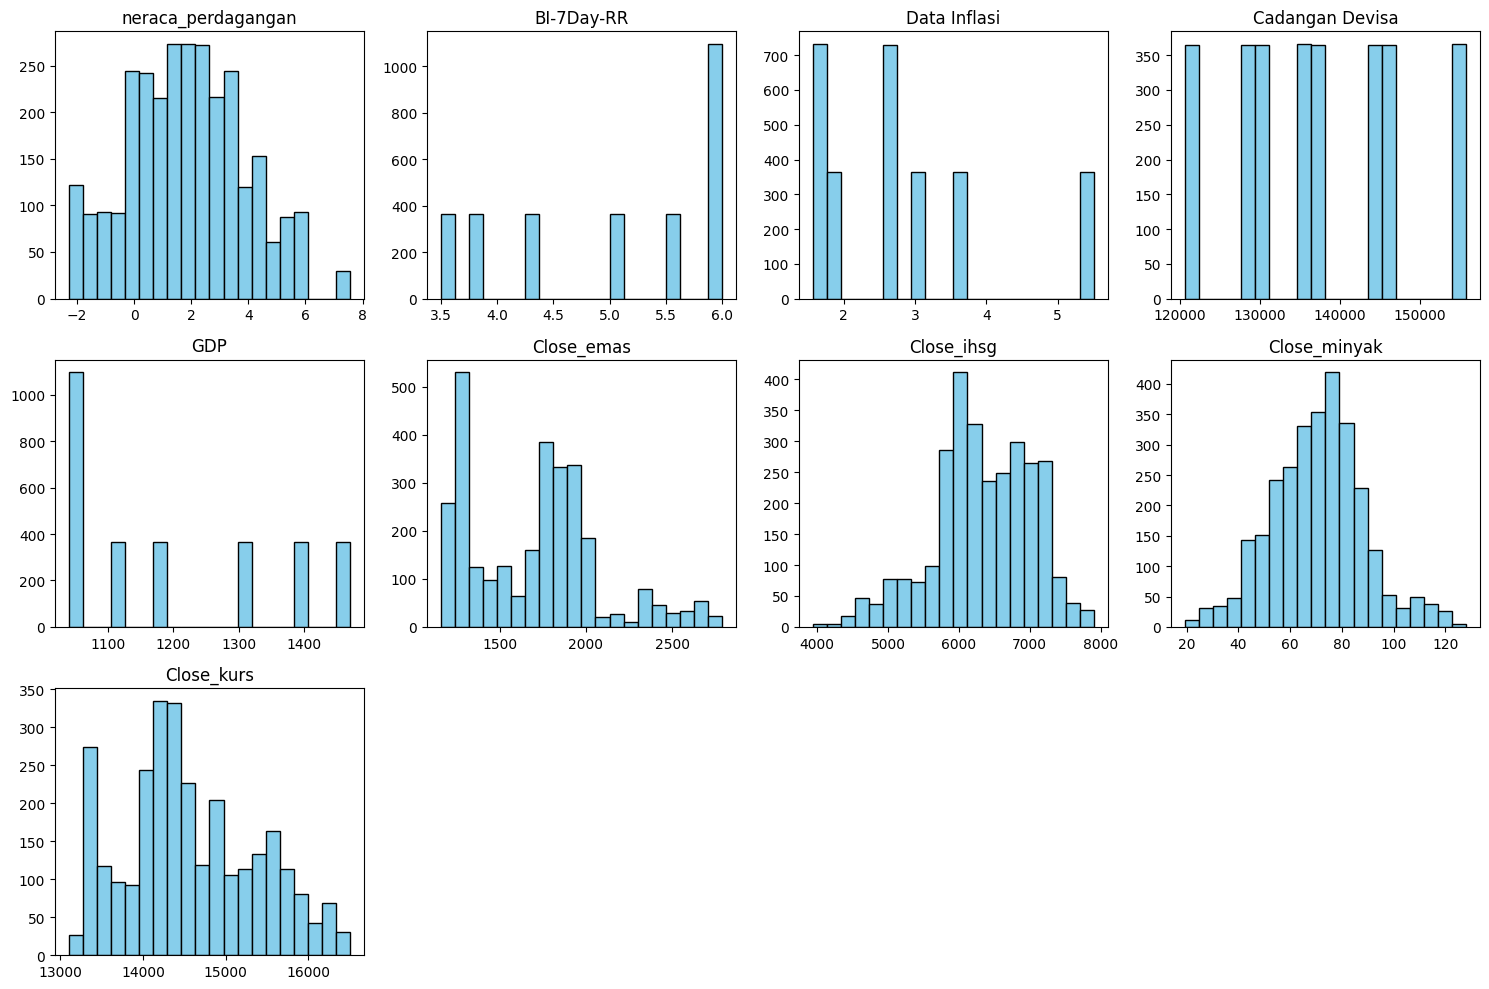

In [ ]:
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include='number').columns

num_cols = len(numerical_cols)
n_cols = int(num_cols ** 0.5) + 1
n_rows = (num_cols // n_cols) + 1

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()

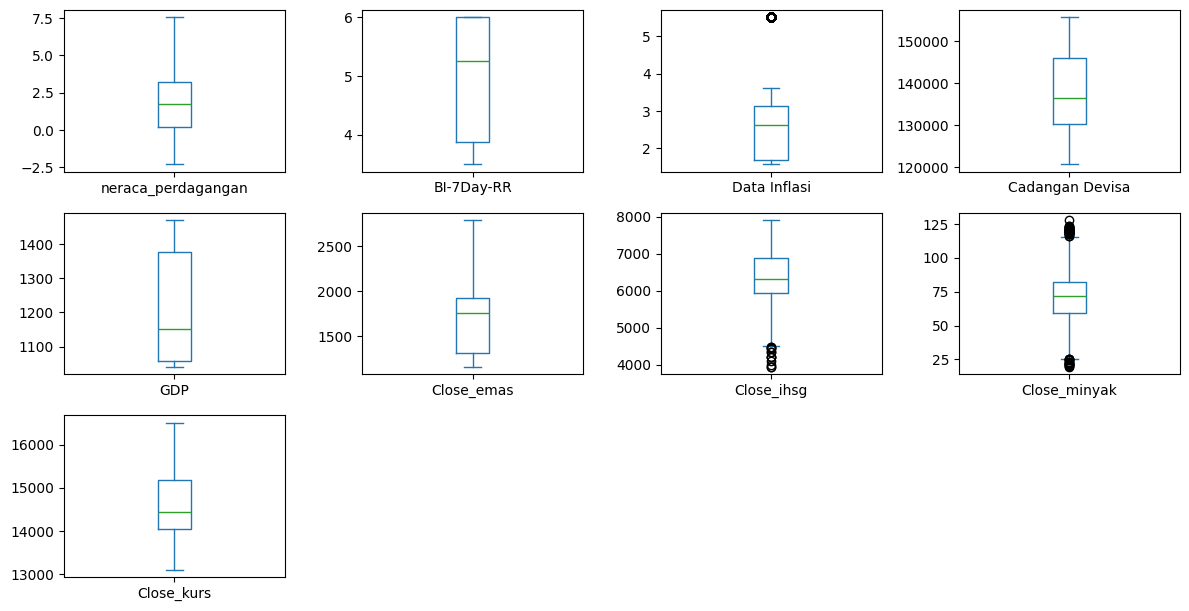

In [ ]:
import matplotlib.pyplot as plt

df.plot(kind='box', subplots=True, layout=(int(len(df.columns)**0.5)+1, int(len(df.columns)**0.5)+1), figsize=(12, 8), sharex=False, sharey=False)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Date,neraca_perdagangan,BI-7Day-RR,Data Inflasi,Cadangan Devisa,GDP,Close_emas,Close_ihsg,Close_minyak,Close_kurs
0,2017-01-01,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0
1,2017-01-02,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0
2,2017-01-03,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13506.0
3,2017-01-04,1.43,4.25,3.61,130196.38,1040,1163.800049,5301.183105,56.459999,13443.0
4,2017-01-05,1.43,4.25,3.61,130196.38,1040,1179.699951,5325.503906,56.889999,13348.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2922 non-null   object 
 1   neraca_perdagangan  2922 non-null   float64
 2   BI-7Day-RR          2922 non-null   float64
 3   Data Inflasi        2922 non-null   float64
 4   Cadangan Devisa     2922 non-null   float64
 5   GDP                 2922 non-null   int64  
 6   Close_emas          2922 non-null   float64
 7   Close_ihsg          2922 non-null   float64
 8   Close_minyak        2922 non-null   float64
 9   Close_kurs          2922 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 228.4+ KB


# Pre-Processing part 2

In [ ]:
df.isnull().sum()

,0
Date,0
neraca_perdagangan,0
BI-7Day-RR,0
Data Inflasi,0
Cadangan Devisa,0
GDP,0
Close_emas,0
Close_ihsg,0
Close_minyak,0
Close_kurs,0


# Membuat Lag

In [ ]:
lag_steps = 2

for i in range(1, lag_steps + 1):
    df[f'Close_kurs_lag{i}'] = df['Close_kurs'].shift(i)

df_lagged = df.dropna().copy()

In [ ]:
df.fillna(method='bfill', inplace=True)

<ipython-input-240-16193d0bb06c>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
df

,Date,neraca_perdagangan,BI-7Day-RR,Data Inflasi,Cadangan Devisa,GDP,Close_emas,Close_ihsg,Close_minyak,Close_kurs,Close_kurs_lag1,Close_kurs_lag2
0,2017-01-01,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0,13512.000000,13512.000000
1,2017-01-02,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0,13512.000000,13512.000000
2,2017-01-03,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13506.0,13512.000000,13512.000000
3,2017-01-04,1.43,4.25,3.61,130196.38,1040,1163.800049,5301.183105,56.459999,13443.0,13506.000000,13512.000000
4,2017-01-05,1.43,4.25,3.61,130196.38,1040,1179.699951,5325.503906,56.889999,13348.0,13443.000000,13506.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2024-12-27,2.23,6.00,1.57,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0,15069.400391,15970.799805
2918,2024-12-28,2.23,6.00,1.57,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0,16189.000000,15069.400391
2919,2024-12-29,2.23,6.00,1.57,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0,16189.000000,16189.000000
2920,2024-12-30,2.23,6.00,1.57,155719.40,1470,2606.100098,7079.904785,74.389999,16178.0,16189.000000,16189.000000


# Modelling LSTM

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0221 - val_loss: 0.0038
Epoch 2/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - val_loss: 6.2842e-04
Epoch 3/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - val_loss: 8.8677e-04
Epoch 4/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 5/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 7/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0010 - val_loss: 4.0628e-04
Epoch 9/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 6.0595e-04
Epoch 10/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 6.5141e-04
Epoch 11/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - val_loss: 6.4917e-04
Epoch 12/100
460/460 ━━━━━━━━

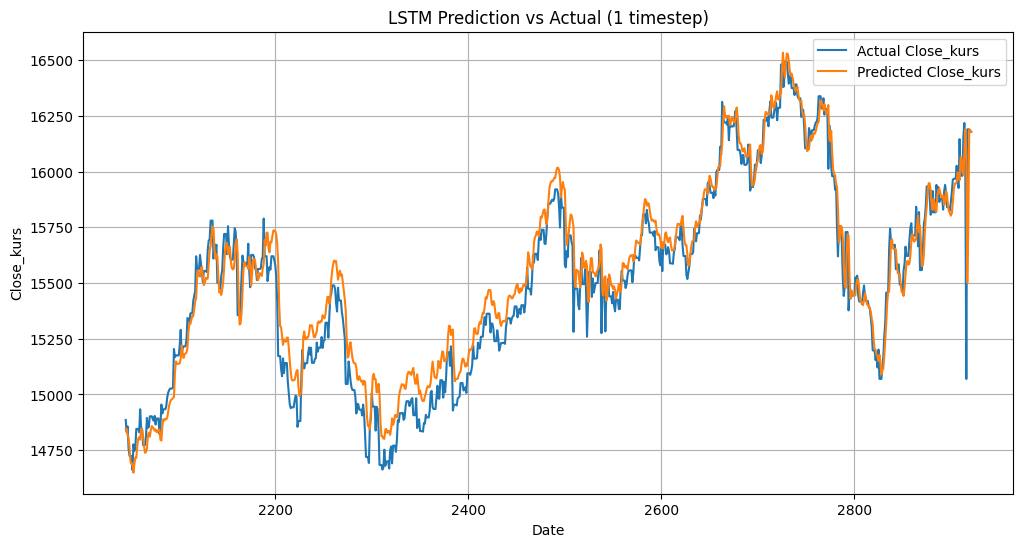

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping


features = ['Close_emas', 'Close_ihsg', 'Close_minyak', 'GDP', 'BI-7Day-RR', 'Data Inflasi', 'Cadangan Devisa','neraca_perdagangan', 'Close_kurs_lag1','Close_kurs_lag2']
target = 'Close_kurs'

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[features + [target]]), columns=features + [target], index=df.index)


X_all = scaled_df[features].values
y_all = scaled_df[target].values

X_all = X_all.reshape((X_all.shape[0], 1, X_all.shape[1]))

split = int(len(X_all) * 0.7)
X_train, X_test = X_all[:split], X_all[split:]
y_train, y_test = y_all[:split], y_all[split:]

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=4,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

y_pred = model.predict(X_test)

y_test_full = np.zeros((len(y_test), len(features)+1))
y_pred_full = np.zeros((len(y_pred), len(features)+1))
y_test_full[:, -1] = y_test
y_pred_full[:, -1] = y_pred.flatten()

y_test_inv = scaler.inverse_transform(y_test_full)[:, -1]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, -1]

rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

test_dates = df.index[-len(y_test_inv):]
plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test_inv, label='Actual Close_kurs')
plt.plot(test_dates, y_pred_inv, label='Predicted Close_kurs')
plt.title('LSTM Prediction vs Actual (1 timestep)')
plt.xlabel('Date')
plt.ylabel('Close_kurs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(df['Close_kurs'].mean())
print(df['Close_kurs'].std())

14567.796988631502
800.7911166050543


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_inv,y_pred_inv)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 0.54%


## Prediksi

In [ ]:
df

,Date,neraca_perdagangan,BI-7Day-RR,Data Inflasi,Cadangan Devisa,GDP,Close_emas,Close_ihsg,Close_minyak,Close_kurs,Close_kurs_lag1,Close_kurs_lag2
0,2017-01-01,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0,13512.000000,13512.000000
1,2017-01-02,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13512.0,13512.000000,13512.000000
2,2017-01-03,1.43,4.25,3.61,130196.38,1040,1160.400024,5275.971191,55.470001,13506.0,13512.000000,13512.000000
3,2017-01-04,1.43,4.25,3.61,130196.38,1040,1163.800049,5301.183105,56.459999,13443.0,13506.000000,13512.000000
4,2017-01-05,1.43,4.25,3.61,130196.38,1040,1179.699951,5325.503906,56.889999,13348.0,13443.000000,13506.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2024-12-27,2.23,6.00,1.57,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0,15069.400391,15970.799805
2918,2024-12-28,2.23,6.00,1.57,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0,16189.000000,15069.400391
2919,2024-12-29,2.23,6.00,1.57,155719.40,1470,2617.199951,7036.570801,74.169998,16189.0,16189.000000,16189.000000
2920,2024-12-30,2.23,6.00,1.57,155719.40,1470,2606.100098,7079.904785,74.389999,16178.0,16189.000000,16189.000000


In [ ]:
df.index = pd.to_datetime(df.index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


                      Tanggal  Forecast_Close_kurs
1970-01-02 00:00:00.000002921         16179.100939
1970-01-03 00:00:00.000002921         16175.319806
1970-01-04 00:00:00.000002921         16173.701289
1970-01-05 00:00:00.000002921         16171.315765
1970-01-06 00:00:00.000002921         16169.374031
1970-01-07 00:00:00.000002921         16167.368869
1970-01-08 00:00:00.000002921         16165.504748
1970-01-09 00:00:00.000002921         16163.693517
1970-01-10 00:00:00.000002921         16161.966788
1970-01-11 00:00:00.000002921         16160.306324
1970-01-12 00:00:00.000002921         16158.715771
1970-01-13 00:00:00.000002921         16157.190268
1970-01-14 00:00:00.000002921         16155.728192
1970-01-15 00:00:00.000002921         16154.326099
1970-01-16 00:00:00.000002921         16152.982164
1970-01-17 00:00:00.000002921         16151.693552
1970-01-18 00:00:00.000002921         16150.458032
1970-01-19 00:00:00.000002921         16149.273375
1970-01-20 00:00:00.000002921  

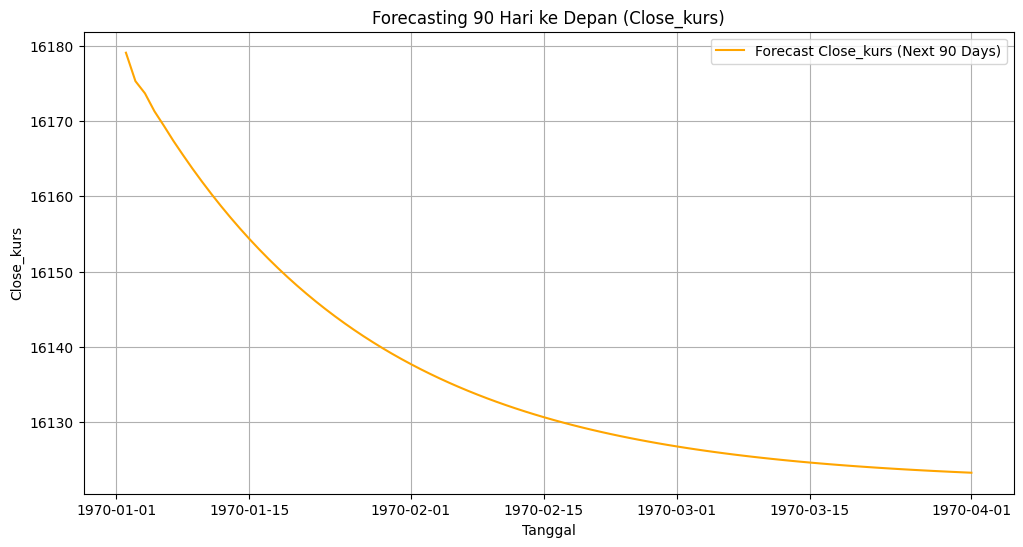

In [ ]:
last_row = scaled_df.iloc[-1].copy()
future_predictions = []

for i in range(90):
    input_features = last_row[features].values.reshape(1, 1, -1)
    next_pred_scaled = model.predict(input_features)[0][0]

    future_predictions.append(next_pred_scaled)

    full_row = last_row.copy()
    full_row[target] = next_pred_scaled

    inverse_input = np.zeros((1, len(features) + 1))
    inverse_input[0, :-1] = last_row[features].values
    inverse_input[0, -1] = next_pred_scaled
    pred_actual = scaler.inverse_transform(inverse_input)[0, -1]

    lag_input = np.zeros((1, len(features) + 1))
    lag_input[0, -1] = pred_actual
    lag_scaled = scaler.transform(lag_input)[0, -1]

    last_row['Close_kurs_lag2'] = last_row['Close_kurs_lag1']
    last_row['Close_kurs_lag1'] = lag_scaled

future_preds_full = np.zeros((len(future_predictions), len(features)+1))
future_preds_full[:, -1] = future_predictions
future_preds_inv = scaler.inverse_transform(future_preds_full)[:, -1]

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90, freq='D')

forecast_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Forecast_Close_kurs': future_preds_inv
})
print(forecast_df.to_string(index=False))

plt.figure(figsize=(12,6))
plt.plot(future_dates, future_preds_inv, label='Forecast Close_kurs (Next 90 Days)', color='orange')
plt.title('Forecasting 90 Hari ke Depan (Close_kurs)')
plt.xlabel('Tanggal')
plt.ylabel('Close_kurs')
plt.grid(True)
plt.legend()
plt.show()

#SARIMAX

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 46.21
RMSE: 86.45


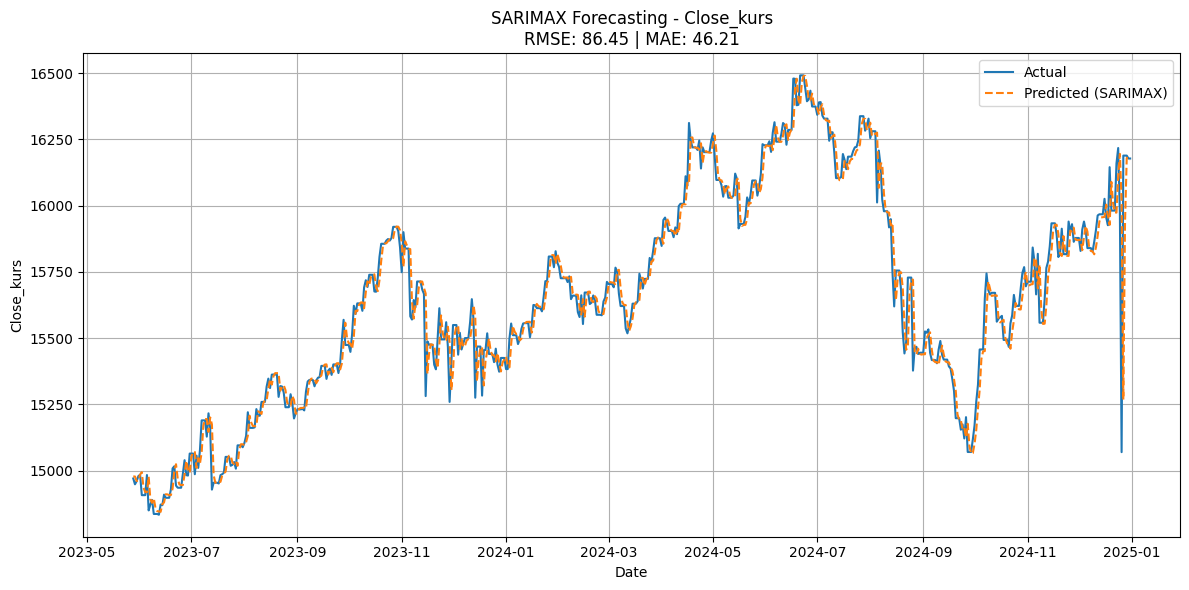

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('datasetprojecth.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

df['lag_1'] = df['Close_kurs'].shift(1)
df['lag_2'] = df['Close_kurs'].shift(2)
df.dropna(inplace=True)

features = ['lag_1', 'lag_2', 'neraca_perdagangan', 'BI-7Day-RR', 'Data Inflasi',
            'Cadangan Devisa', 'GDP', 'Close_emas', 'Close_ihsg', 'Close_minyak']
target = 'Close_kurs'

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

split_idx = int(len(df) * 0.8)
y_train_actual = df[target].iloc[:split_idx]
y_test_actual = df[target].iloc[split_idx:]
exog_train = df[features].iloc[:split_idx]
exog_test = df[features].iloc[split_idx:]
date_test = df.index[split_idx:]

model = SARIMAX(
    y_train_actual,
    exog=exog_train,
    order=(1, 0, 1),
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False)

y_pred = model_fit.predict(start=y_test_actual.index[0], end=y_test_actual.index[-1], exog=exog_test)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test_actual, label='Actual')
plt.plot(date_test, y_pred, label='Predicted (SARIMAX)', linestyle='--')
plt.title(f'SARIMAX Forecasting - Close_kurs\nRMSE: {rmse:.2f} | MAE: {mae:.2f}')
plt.xlabel('Date')
plt.ylabel('Close_kurs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Prediksi

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


   Tanggal  Forecast_Close_kurs
2025-01-01          Rp16,172.13
2025-01-02          Rp16,172.13
2025-01-03          Rp16,172.13
2025-01-04          Rp16,172.13
2025-01-05          Rp16,172.13
2025-01-06          Rp16,172.13
2025-01-07          Rp16,172.13
2025-01-08          Rp16,172.13
2025-01-09          Rp16,172.13
2025-01-10          Rp16,172.13
2025-01-11          Rp16,172.13
2025-01-12          Rp16,172.13
2025-01-13          Rp16,172.13
2025-01-14          Rp16,172.13
2025-01-15          Rp16,172.13
2025-01-16          Rp16,172.13
2025-01-17          Rp16,172.13
2025-01-18          Rp16,172.13
2025-01-19          Rp16,172.13
2025-01-20          Rp16,172.13
2025-01-21          Rp16,172.13
2025-01-22          Rp16,172.13
2025-01-23          Rp16,172.13
2025-01-24          Rp16,172.13
2025-01-25          Rp16,172.13
2025-01-26          Rp16,172.13
2025-01-27          Rp16,172.13
2025-01-28          Rp16,172.13
2025-01-29          Rp16,172.13
2025-01-30          Rp16,172.13
2025-01-

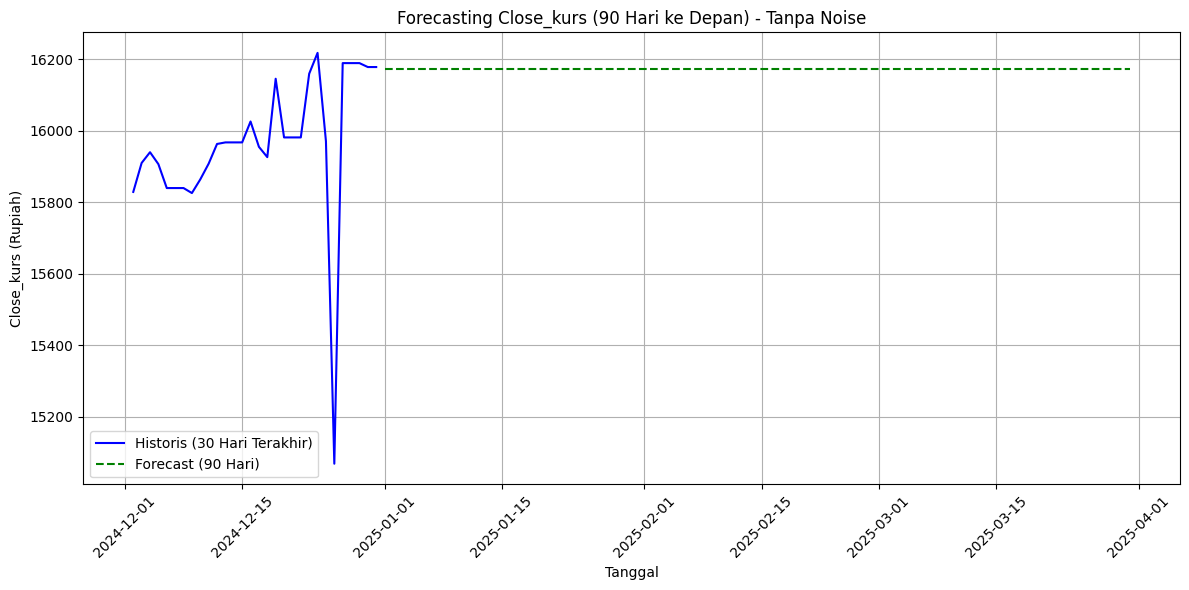

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

features = ['lag_1', 'lag_2',
    'neraca_perdagangan', 'BI-7Day-RR', 'Data Inflasi',
    'Cadangan Devisa', 'GDP',
    'Close_emas', 'Close_ihsg', 'Close_minyak'
]

macro_features = [f for f in features if f not in ['lag_1', 'lag_2']]
last_macro = df.iloc[-1][macro_features]

future_days = 90
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

exog_future = pd.DataFrame([last_macro.values] * future_days, columns=macro_features, index=future_dates)

lag_1 = df['Close_kurs'].iloc[-1]
lag_2 = df['Close_kurs'].iloc[-2]

exog_hist = df[macro_features]
model_fit = ARIMA(df['Close_kurs'], order=(2, 0, 0), exog=exog_hist).fit()

predictions = []
for i in range(future_days):
    row = exog_future.iloc[i].copy()
    full_row = row.to_frame().T
    next_pred = model_fit.forecast(steps=1, exog=full_row)
    next_val = next_pred.iloc[0]
    predictions.append(next_val)

    lag_2 = lag_1
    lag_1 = next_val


forecast_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Forecast_Close_kurs': predictions
})

pd.options.display.float_format = 'Rp{:,.2f}'.format
print(forecast_df.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.plot(df.index[-30:], df['Close_kurs'].iloc[-30:], label='Historis (30 Hari Terakhir)', color='blue')
plt.plot(forecast_df['Tanggal'], forecast_df['Forecast_Close_kurs'], label='Forecast (90 Hari)', linestyle='--', color='green')
plt.title('Forecasting Close_kurs (90 Hari ke Depan) - Tanpa Noise')
plt.xlabel('Tanggal')
plt.ylabel('Close_kurs (Rupiah)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#XGBoost

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('datasetprojecth.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)

df['lag_1'] = df['Close_kurs'].shift(1)
df['lag_2'] = df['Close_kurs'].shift(2)

df.dropna(inplace=True)

date_col = df['Date']

features = ['lag_1', 'lag_2',
    'neraca_perdagangan', 'BI-7Day-RR', 'Data Inflasi',
    'Cadangan Devisa', 'GDP',
    'Close_emas', 'Close_ihsg', 'Close_minyak'
]

target = 'Close_kurs'

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

split_idx = int(len(df) * 0.8)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]
date_test = date_col.iloc[split_idx:]


In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train.ravel())

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')


RMSE: 138.55
MAE: 103.38


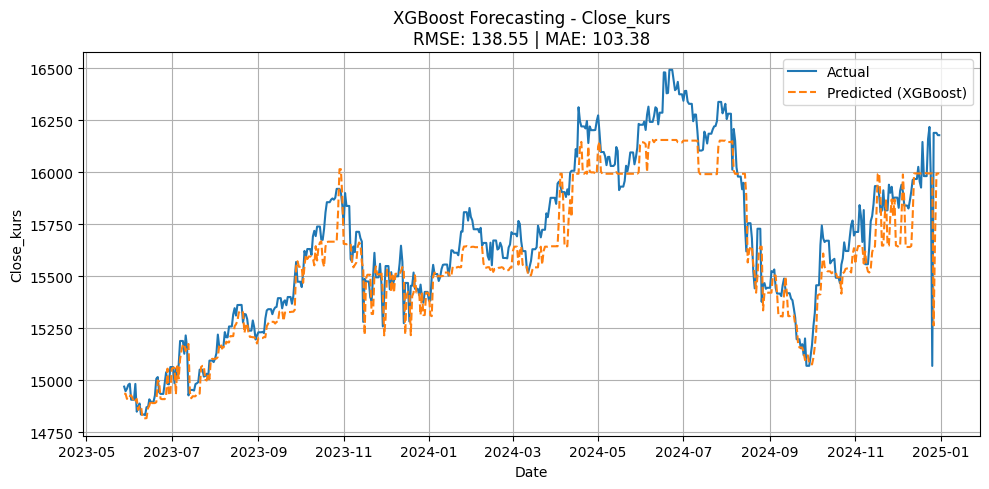

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(date_test, y_test_actual, label='Actual')
plt.plot(date_test, y_pred, label='Predicted (XGBoost)', linestyle='--')
plt.title(f'XGBoost Forecasting - Close_kurs\nRMSE: {rmse:.2f} | MAE: {mae:.2f}')
plt.xlabel('Date')
plt.ylabel('Close_kurs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
print(df['Close_kurs'].mean())
print(df['Close_kurs'].std())

14568.520137253852
800.5882235280876


In [9]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_actual, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 0.65%


##Prediksi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

   Tanggal  Forecast_Close_kurs
2025-01-01          Rp15,994.11
2025-01-02          Rp15,994.11
2025-01-03          Rp15,994.11
2025-01-04          Rp15,994.11
2025-01-05          Rp15,994.11
2025-01-06          Rp15,994.11
2025-01-07          Rp15,994.11
2025-01-08          Rp15,994.11
2025-01-09          Rp15,994.11
2025-01-10          Rp15,994.11
2025-01-11          Rp15,994.11
2025-01-12          Rp15,994.11
2025-01-13          Rp15,994.11
2025-01-14          Rp15,994.11
2025-01-15          Rp15,994.11
2025-01-16          Rp15,994.11
2025-01-17          Rp15,994.11
2025-01-18          Rp15,994.11
2025-01-19          Rp15,994.11
2025-01-20          Rp15,994.11
2025-01-21          Rp15,994.11
2025-01-22          Rp15,994.11
2025-01-23          Rp15,994.11
2025-01-24          Rp15,994.11
2025-01-25          Rp15,994.11
2025-01-26          Rp15,994.11
2025-01-27          Rp15,994.11
2025-01-28          Rp15,994.11
2025-01-29          Rp15,994.11
2025-01-30          Rp15,994.11
2025-01-

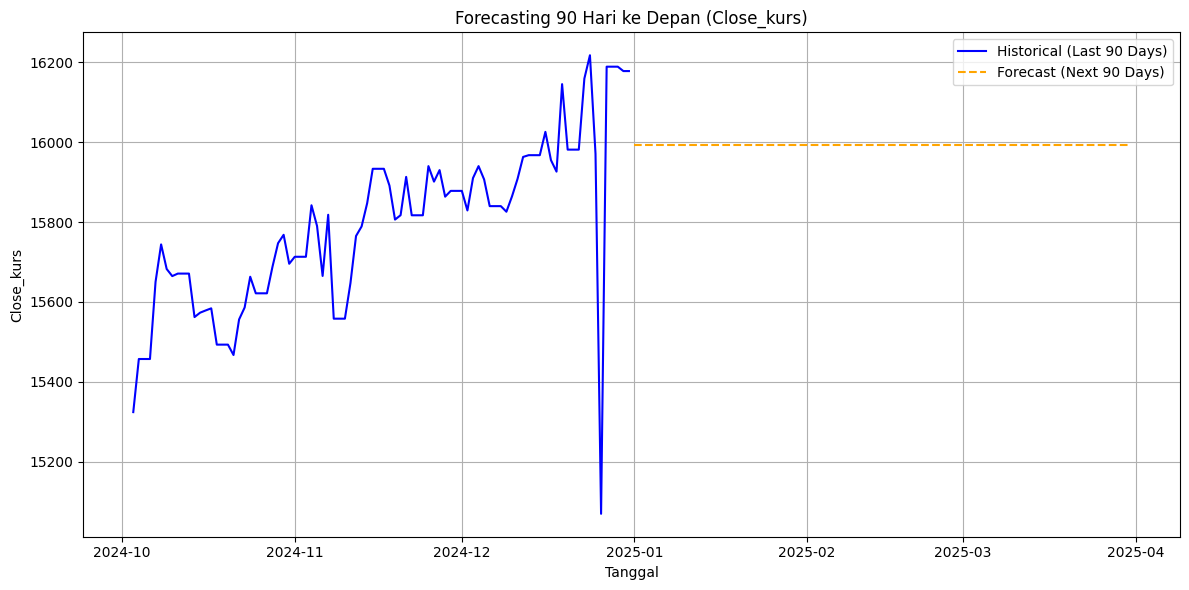

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

last_row = df.iloc[-1].copy()

lag_1 = last_row['Close_kurs']
lag_2 = df.iloc[-2]['Close_kurs']

macro_static = last_row.copy()
macro_static = macro_static.drop(['Date', 'Close_kurs', 'lag_1', 'lag_2'], errors='ignore')

future_predictions = []
future_dates = []

current_date = last_row['Date']

for i in range(90):
    input_row = macro_static.copy()
    input_row['lag_1'] = lag_1
    input_row['lag_2'] = lag_2

    input_ordered = input_row[features]

    X_input_scaled = scaler_X.transform([input_ordered])

    y_pred_scaled = model.predict(X_input_scaled)

    y_pred_actual = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]

    current_date += timedelta(days=1)
    future_dates.append(current_date)
    future_predictions.append(y_pred_actual)

    lag_2 = lag_1
    lag_1 = y_pred_actual

forecast_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Forecast_Close_kurs': future_predictions
})
print(forecast_df.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-90:], df['Close_kurs'].iloc[-90:], label='Historical (Last 90 Days)', color='blue')
plt.plot(future_dates, future_predictions, label='Forecast (Next 90 Days)', linestyle='--', color='orange')
plt.title('Forecasting 90 Hari ke Depan (Close_kurs)')
plt.xlabel('Tanggal')
plt.ylabel('Close_kurs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
